 # Abhishek-kumar | PES1PG22CA005 | SECTION = A

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            NaN      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0

## Missing value Treatement

In [4]:
df.isnull

<bound method DataFrame.isnull of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            NaN      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
795          8.0    167.0          106.0           46.0    231.0  37.6   
796          9.0    145.0           80.0           46.0    130.0  37.9   
797          6.0    115.0           60.0           39.0      0.0  33.7   
798          1.0    112.0           80.0           45.0    132.0  34.8   
799          4.0    145.0           82.0           18.0      NaN   NaN   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.627 

In [5]:
df.isnull().sum()

Pregnancies                   1
Glucose                       5
BloodPressure                36
SkinThickness               235
Insulin                       1
BMI                          12
DiabetesPedigreeFunction      1
Age                           1
Outcome                       1
dtype: int64

### Copy to make changes 

In [6]:
df1 = df.copy(deep = True)

In [7]:
df1.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            NaN      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
4          0.0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     2.288  33.0      1.0

In [8]:
df1.isnull().sum()

Pregnancies                   1
Glucose                       5
BloodPressure                36
SkinThickness               235
Insulin                       1
BMI                          12
DiabetesPedigreeFunction      1
Age                           1
Outcome                       1
dtype: int64

In [9]:
df1[df1.isna().any(axis=1)]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
2            8.0    183.0           64.0            NaN      0.0  23.3   
5            5.0    116.0           74.0            NaN      0.0  25.6   
7           10.0    115.0            NaN            NaN      0.0  35.3   
9            8.0    125.0           96.0            NaN      0.0   NaN   
10           4.0    110.0           92.0            NaN      0.0  37.6   
..           ...      ...            ...            ...      ...   ...   
776          4.0     90.0            NaN            NaN      0.0  28.0   
786          2.0    120.0           54.0            NaN      0.0  26.8   
791         11.0    127.0          106.0            NaN      0.0  39.0   
793         10.0    162.0           84.0            NaN      0.0  27.7   
799          4.0    145.0           82.0           18.0      NaN   NaN   

     DiabetesPedigreeFunction   Age  Outcome  
2                       0.672  32.0      1.0  
5                       0.201  30.0      0.0  
7                       0.134  29.0      0.0  
9                       0.232  54.0      1.0  
10                      0.191  30.0      0.0  
..                        ...   ...      ...  
776                     0.610  31.0      0.0  
786                     0.455  27.0      0.0  
791                     0.190  51.0      0.0  
793                     0.182  54.0      0.0  
799                       NaN   NaN      NaN  

[245 rows x 9 columns]

### filling missing values with mean beacuse missing values are Numbers only.

In [10]:
df1 = df1.fillna(df1.mean())
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Perform an exploratory data analysis with respect to the Outcome variable

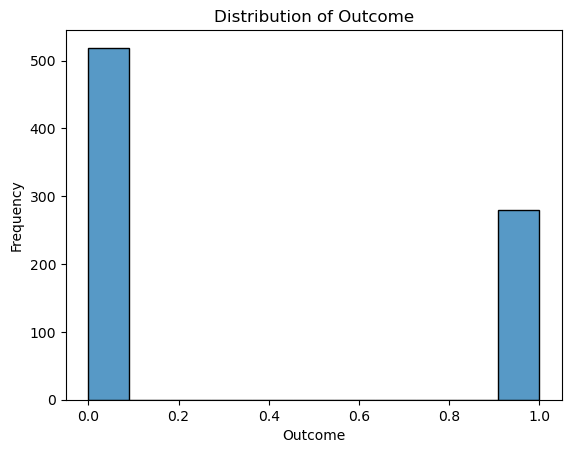

In [11]:

sns.histplot(data = df, x = 'Outcome')
plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Outcome')
plt.show()

## Check for outliers with appropriate plots

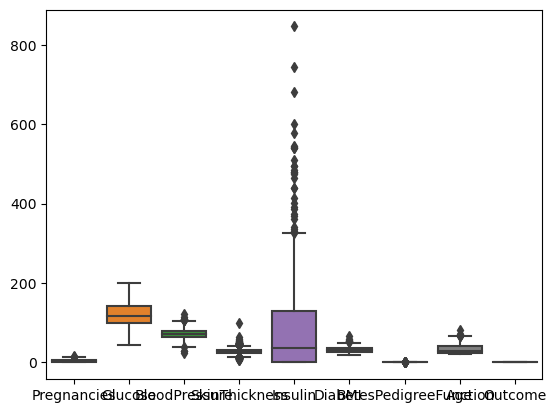

In [12]:
sns.boxplot(data = df1)
plt.show()


## Remove the outliers from the dataset

### Removing Outliers using Standard Deviation

In [13]:
def determine_outlier_thresholds_std(dataframe, col_name):
    upper_boundary = dataframe[col_name].mean() + 3 * dataframe[col_name].std()
    lower_boundary = dataframe[col_name].mean() - 3 * dataframe[col_name].std()
    return lower_boundary, upper_boundary
def check_outliers_std(dataframe, col_name):
    lower_boundary, upper_boundary = determine_outlier_thresholds_std(dataframe, col_name)
    if dataframe[(dataframe[col_name] > upper_boundary) | (dataframe[col_name] < lower_boundary)].any(axis=None):
        return True
    else: 
        return False

def replace_with_thresholds_std(dataframe, cols, replace=False):
    from tabulate import tabulate
    data = []
    for col_name in cols:
        if col_name != 'Outcome':
            outliers_ = check_outliers_std(dataframe, col_name)
            count = None
            lower_limit, upper_limit = determine_outlier_thresholds_std(dataframe, col_name)
            if outliers_:
                count = dataframe[(dataframe[col_name] > upper_limit) | (dataframe[col_name] < lower_limit)][col_name].count()
                if replace:
                    if lower_limit < 0:
                       
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
                    else:
                        dataframe.loc[(dataframe[col_name] < lower_limit), col_name] = lower_limit
                        dataframe.loc[(dataframe[col_name] > upper_limit), col_name] = upper_limit
            outliers_status = check_outliers_std(dataframe, col_name)
            data.append([outliers_, outliers_status,count, col_name, lower_limit, upper_limit])
    table = tabulate(data, headers=['Outlier (Previously)','Outliers','Count', 'Column','Lower Limit', 'Upper Limit'], tablefmt='rst', numalign='right')
    print("Removing Outliers using 3 Standard Deviation")
    print(table)

replace_with_thresholds_std(df1, df1.columns,replace=True)

Removing Outliers using 3 Standard Deviation
======================  ==========  =======  ========================  =============  =============
Outlier (Previously)    Outliers      Count  Column                      Lower Limit    Upper Limit
======================  ==========  =======  ========================  =============  =============
True                    True              4  Pregnancies                    -6.25361        13.9307
False                   False                Glucose                         30.6577        212.983
True                    True              8  BloodPressure                   36.0432         108.86
True                    True              4  SkinThickness                   2.83279        55.6557
True                    True             20  Insulin                        -265.958        427.235
True                    True              5  BMI                             11.9447        52.9477
True                    True             11  DiabetesPe

### Graph after Removal

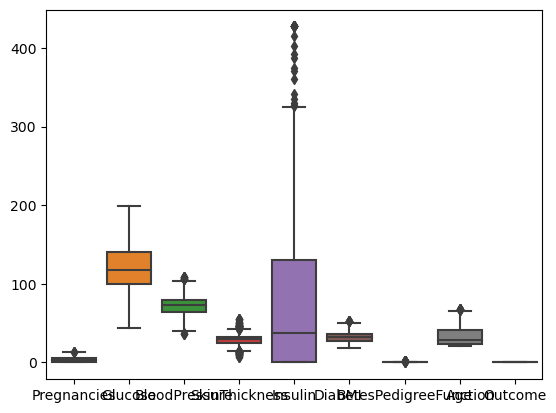

In [14]:
sns.boxplot(data = df1)
plt.show()


## Perform feature scaling for the features


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df1.drop('Outcome', axis=1))
y = df1['Outcome']
y

0      1.000000
1      0.000000
2      1.000000
3      0.000000
4      1.000000
         ...   
795    1.000000
796    1.000000
797    1.000000
798    0.000000
799    0.350438
Name: Outcome, Length: 800, dtype: float64

## Find & List the most important 5 features to determine the Outcome variable


In [16]:
corr_matrix = df1.corr()
imp_features = corr_matrix['Outcome'].sort_values(ascending=False)[1:6].index.values
print('5 features:', imp_features)

5 features: ['Glucose' 'BMI' 'Age' 'Pregnancies' 'SkinThickness']


## Check with heatmap or correlation matrix to confirm the 5 selected features

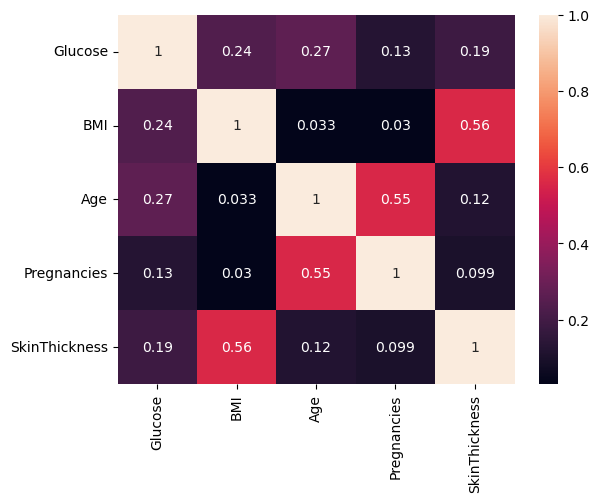

In [17]:
sns.heatmap(df1[imp_features].corr(), annot=True)
plt.show()

## Perform PCA and generate two components for the 5 features selected

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X[:, [np.where(df1.columns==f)[0][0] for f in imp_features]])
X_pca

array([[ 1.7258997 , -0.64951849],
       [-1.34948141,  0.04004377],
       [ 0.72613394, -1.26438515],
       ...,
       [ 1.09667435, -0.02015419],
       [ 0.18841097,  1.85216952],
       [-0.28702016, -0.59516236]])

## Split the data into train and test (75:25) keeping the target variable as Outcome

In [23]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pca, y, test_size=0.25, random_state=0)
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (600, 2), y_train shape: (600,)
X_test shape: (200, 2), y_test shape: (200,)


In [25]:
from sklearn.linear_model import LinearRegression
slr= LinearRegression()
slr.fit(xtrain,ytrain)

LinearRegression()

In [26]:
ypred= slr.predict(xtest)
from sklearn.metrics import r2_score
r2_score(ytest,ypred) #31% is the accuracy 

0.22028188255082004